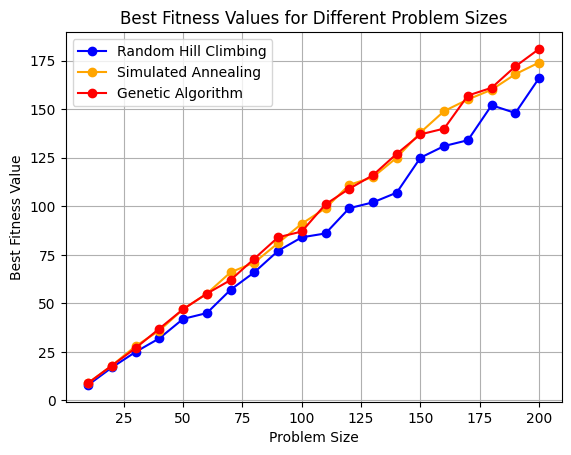

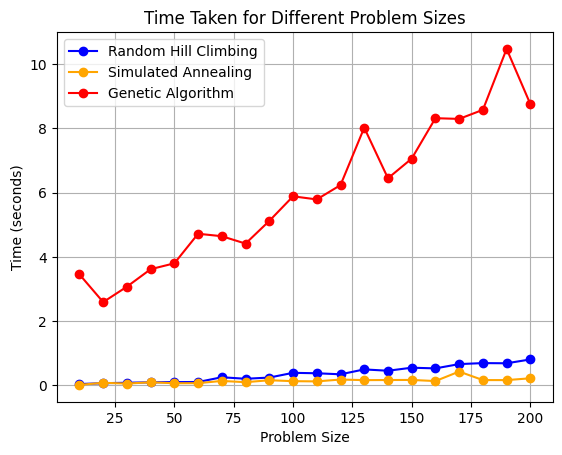

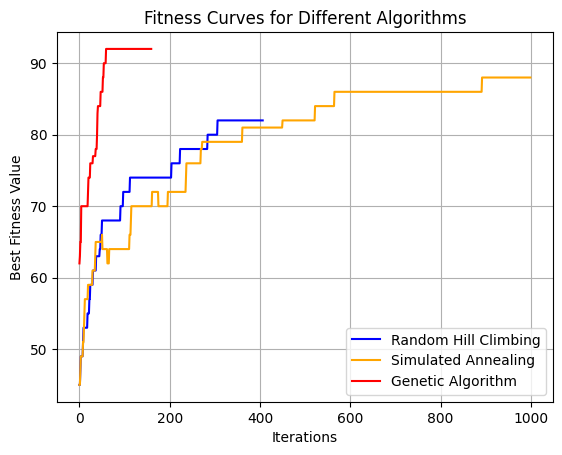

In [2]:
#Fine
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt
import time
from random import randint
import pandas as pd
import warnings
seeds = [42, 43, 44, 45, 46]
#Fine
# Adapted from ChatGPT
# Define the fitness function for Flip-Flop problem
fitness = mlrose.FlipFlop()
state = 100
# Function to initialize problem
def initialize(problem_length):
    init_state = np.random.randint(2, size=problem_length)
    return problem_length, init_state

# Function to run optimization algorithms on a given problem
def run_optimizations(problem_length, state):
    problem_length, init_state_var = initialize(problem_length)
    problem = mlrose.DiscreteOpt(length=problem_length, fitness_fn=fitness, maximize=True, max_val=2)
    
    # Random Hill Climbing
    start_time = time.time()
    rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose.random_hill_climb(problem,
                                                                                  max_attempts=100, 
                                                                                  max_iters=1000, 
                                                                                  restarts=10, 
                                                                                  init_state=init_state_var, 
                                                                                  curve=True, 
                                                                                  random_state=state)
    rhc_time = time.time() - start_time
    
    # Simulated Annealing
    start_time = time.time()
    sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose.simulated_annealing(problem,
                                                                                  schedule=mlrose.ExpDecay(),
                                                                                  max_attempts=100, 
                                                                                  max_iters=1000, 
                                                                                  init_state=init_state_var, 
                                                                                  curve=True, 
                                                                                  random_state=state)
    sa_time = time.time() - start_time
    
    # Genetic Algorithm
    start_time = time.time()
    ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose.genetic_alg(problem, 
                                                                          pop_size=200, 
                                                                          mutation_prob=0.1, 
                                                                          max_attempts=100, 
                                                                          max_iters=1000, 
                                                                          curve=True, 
                                                                          random_state=state)
    ga_time = time.time() - start_time
    
    return rhc_best_state,sa_best_state,ga_best_state,rhc_best_fitness, sa_best_fitness, ga_best_fitness,rhc_fitness_curve, sa_fitness_curve, ga_fitness_curve , rhc_time, sa_time, ga_time

# Define different problem sizes
# problem_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
problem_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,110,120,130,140,150,160,170,180,190,200]
rhc_best_fitness_values = []
sa_best_fitness_values = []
ga_best_fitness_values = []
rhc_times = []
sa_times = []
ga_times = []


#fine
# Run optimization for each problem size and sizes

for size in problem_sizes:
    _,_,_,rhc_best_fitness, sa_best_fitness, ga_best_fitness,_,_,_,rhc_time, sa_time, ga_time = run_optimizations(size, state)
    rhc_best_fitness_values.append(rhc_best_fitness)
    sa_best_fitness_values.append(sa_best_fitness)
    ga_best_fitness_values.append(ga_best_fitness)
    rhc_times.append(rhc_time)
    sa_times.append(sa_time)
    ga_times.append(ga_time)


# Plotting the best fitness values for different problem sizes
plt.figure()

plt.plot(problem_sizes, rhc_best_fitness_values, label='Random Hill Climbing', marker='o', color='blue')
plt.plot(problem_sizes, sa_best_fitness_values, label='Simulated Annealing', marker='o', color='orange')
plt.plot(problem_sizes, ga_best_fitness_values, label='Genetic Algorithm', marker='o', color='red')

# Adding title and labels
plt.title('Best Fitness Values for Different Problem Sizes')
plt.xlabel('Problem Size')
plt.ylabel('Best Fitness Value')
# Adding legend
plt.legend()
# Adding grid
plt.grid()
# Show the plot
plt.show()

# Plotting the time taken for different problem sizes
plt.figure()

plt.plot(problem_sizes, rhc_times, label='Random Hill Climbing', marker='o', color='blue')
plt.plot(problem_sizes, sa_times, label='Simulated Annealing', marker='o', color='orange')
plt.plot(problem_sizes, ga_times, label='Genetic Algorithm', marker='o', color='red')

# Adding title and labels
plt.title('Time Taken for Different Problem Sizes')
plt.xlabel('Problem Size')
plt.ylabel('Time (seconds)')
# Adding legend
plt.legend()
# Adding grid
plt.grid()
# Show the plot
plt.show()

problem_length = 100
state = 123
_,_,_,_,_,_,rhc_fitness_curve, sa_fitness_curve, ga_fitness_curve,_,_,_ = run_optimizations(problem_length, state)
# Plotting the fitness curves for each algorithm
plt.figure()

plt.plot(rhc_fitness_curve[:,0], label='Random Hill Climbing', color='blue')
plt.plot(sa_fitness_curve[:,0], label='Simulated Annealing', color='orange')
plt.plot(ga_fitness_curve[:,0], label='Genetic Algorithm', color='red')

# Adding title and labels
plt.title('Fitness Curves for Different Algorithms')
plt.xlabel('Iterations')
plt.ylabel('Best Fitness Value')

# Adding legend
plt.legend()

# Adding grid
plt.grid()

# Show the plot
plt.show()







# Run optimization for each problem size

Finetuning the Parameters
RHC

In [3]:
#fine
# Define the fitness function for Flip-Flop problem
fitness = mlrose.FlipFlop()

problem_length = 100
# Function to initialize problem
def initialize(problem_length):
    init_state = np.random.randint(2, size=problem_length)
    return problem_length, init_state

# Function to run optimization algorithms on a given problem
problem_length, init_state_var = initialize(problem_length)
problem = mlrose.DiscreteOpt(length=problem_length, fitness_fn=fitness, maximize=True, max_val=2) 


    # Random Hill Climbing

seeds = [42, 43, 44, 45, 46]

# Initialize lists to collect results
rhc_best_fitness_values = []
rhc_fitness_curves = []
best_rhc_fitness_curve = []
best_rhc_fitness_curves = pd.DataFrame()
for state in seeds:
    rhc = mlrose.RHCRunner(problem=problem,
                        experiment_name="RHC_FlipFlop",
                        output_directory="./RHC_Optimization",
                        seed=state,
                        iteration_list=2**np.arange(10),
                        restart_list=2**np.arange(5),
                        max_attempts=10,
                        generate_curves=True,
                        init_state=init_state_var)

    rhc_run_stats, rhc_run_curves = rhc.run()
    #best_rhc_stats = rhc_run_stats.loc[rhc_run_stats['Fitness'] == rhc_run_stats['Fitness'].max()].iloc[0]

    sorted_rhc_run_curves = rhc_run_curves.sort_values(by=['Fitness', 'Time', 'FEvals', 'max_iters'], 
                                                   ascending=[False, True, True, True])
    best_rhc_fitness_curve = sorted_rhc_run_curves.head(1)
    best_rhc_fitness_curves = pd.concat([best_rhc_fitness_curves, best_rhc_fitness_curve], ignore_index=True)


decay_schedules = [mlrose.ExpDecay, mlrose.GeomDecay, mlrose.ArithDecay]
sa_results = []
for state in seeds:
    for decay in decay_schedules:
        sa = mlrose.SARunner(problem=problem,
                                experiment_name="SA_FlipFlop",
                                output_directory="./SA_Optimization",
                                seed=state,
                                iteration_list=2**np.arange(10),
                                temperature_list=[1, 10, 50, 100, 250, 500, 1000],
                                restart_list=2**np.arange(5),
                                decay_list=[decay],
                                max_attempts=10,
                                generate_curves=True,
                                init_state=init_state_var)
        
        sa_run_stats, sa_run_curves = sa.run()
        sa_results.append((sa_run_stats, sa_run_curves))
        
        # Combine all SA results
    combined_sa_run_stats = pd.concat([res[0] for res in sa_results])
    combined_sa_run_curves = pd.concat([res[1] for res in sa_results])

# Genetic Algorithm
ga_results = []
for state in seeds:
    for pop_size in [100, 200, 300]:
        for mutation_prob in [0.1, 0.2, 0.3]:
            ga = mlrose.GARunner(problem=problem,
                                    experiment_name="GA_FlipFlop",
                                    output_directory="./GA_Optimization",
                                    seed=state,
                                    iteration_list=2**np.arange(10),
                                    population_sizes=[pop_size],
                                    mutation_rates=[mutation_prob],
                                    max_attempts=10,
                                    generate_curves=True,
                                    init_state=init_state_var)
            
            ga_run_stats, ga_run_curves = ga.run()
            ga_results.append((ga_run_stats, ga_run_curves))

    # Combine all GA results
    combined_ga_run_stats = pd.concat([res[0] for res in ga_results])
    combined_ga_run_curves = pd.concat([res[1] for res in ga_results])

sorted_rhc_run_curves = best_rhc_fitness_curves.sort_values(by=['Fitness', 'Time', 'FEvals', 'max_iters'], 
                                                   ascending=[False, True, True, True])

# Display the sorted DataFrame
#top_5_rhc_run_curves = sorted_rhc_run_curves.head(5)
#print(top_5_rhc_run_curves)

# Extract the best parameters from the sorted DataFrame
best_rhc_stats = sorted_rhc_run_curves.iloc[0]
best_fitness = best_rhc_stats['Fitness']
best_time = best_rhc_stats['Time']
best_fevals = best_rhc_stats['FEvals']
best_max_iters = best_rhc_stats['max_iters']
best_restarts = best_rhc_stats['Restarts']


# Print the best parameters
print("Best RHC Parameters:")
print(f"Best Fitness: {best_fitness}")
print(f"Time: {best_time}")
print(f"Function Evaluations: {best_fevals}")
print(f"Max Iterations: {best_max_iters}")
print(f"best_restarts: {best_restarts}")


sorted_sa_run_curves = combined_sa_run_stats.sort_values(by=['Fitness', 'Time', 'FEvals', 'Iteration'], ascending=[False, True, True, True])
top_5_sa_run_curves = sorted_sa_run_curves.head(5)
#print(top_5_sa_run_curves)

best_sa_stats = sorted_sa_run_curves.iloc[0]
best_fitness = best_sa_stats['Fitness']
best_time = best_sa_stats['Time']
best_fevals = best_sa_stats['FEvals']
best_max_iters = best_sa_stats['max_iters']
best_schedule_type = best_sa_stats['schedule_type']
best_initial_temparature = best_sa_stats['schedule_init_temp']

print("\n")

# Print the best parameters
print("Best SA Parameters:")
print(f"Best Fitness: {best_fitness}")
print(f"Time: {best_time}")
print(f"Function Evaluations: {best_fevals}")
print(f"Max Iterations: {best_max_iters}")
print(f"best_schedule_type: {best_schedule_type}")
print(f"best_Temparature: {best_initial_temparature}")

print("\n")

sorted_ga_run_curves = combined_ga_run_stats.sort_values(by=['Fitness', 'Time', 'FEvals', 'Iteration'], ascending=[False, True, True, True])

best_ga_stats = sorted_ga_run_curves.iloc[0]

best_fitness = best_ga_stats['Fitness']
best_time = best_ga_stats['Time']
best_fevals = best_ga_stats['FEvals']
best_max_iters = best_ga_stats['max_iters']
best_pop_size = best_ga_stats['Population Size']
best_mutation_prob = best_ga_stats['Mutation Rate']

# Print the best parameters
print("Best GA Parameters:")
print(f"Best Fitness: {best_fitness}")
print(f"Time: {best_time}")
print(f"Function Evaluations: {best_fevals}")
print(f"Max Iterations: {best_max_iters}")
print(f"best_population_size: {best_pop_size}")
print(f"best_mutation_prob: {best_mutation_prob}")

Best RHC Parameters:
Best Fitness: 70.0
Time: 0.1378210990005755
Function Evaluations: 149.0
Max Iterations: 512
best_restarts: 2


Best SA Parameters:
Best Fitness: 87.0
Time: 0.49183787800029677
Function Evaluations: 700
Max Iterations: 512
best_schedule_type: geometric
best_Temparature: 10


Best GA Parameters:
Best Fitness: 93.0
Time: 3.5965759989994694
Function Evaluations: 19581
Max Iterations: 512
best_population_size: 300
best_mutation_prob: 0.3


In [4]:

fitness = mlrose.FlipFlop()

problem_length = 100
# Function to initialize problem
def initialize(problem_length):
    init_state = np.random.randint(2, size=problem_length)
    return problem_length, init_state

# Function to run optimization algorithms on a given problem
problem_length, init_state_var = initialize(problem_length)
problem = mlrose.DiscreteOpt(length=problem_length, fitness_fn=fitness, maximize=True, max_val=2) 
# Initialize lists to collect results
rhc_best_fitness_values = []
rhc_fitness_curves = []
best_rhc_fitness_curve = []
best_rhc_fitness_curves = pd.DataFrame()
rhc_results = []
for state in seeds:
    rhc = mlrose.RHCRunner(problem=problem,
                        experiment_name="RHC_FlipFlop",
                        output_directory="./RHC_Optimization",
                        seed=state,
                        iteration_list=[best_rhc_stats['max_iters']], 
                        restart_list=[best_rhc_stats['Restarts']], 
                        max_attempts=10,
                        generate_curves=True,
                        init_state=init_state_var)

    rhc_run_stats, rhc_run_curves = rhc.run()
    rhc_results.append((rhc_run_stats, rhc_run_curves))
combined_rhc_run_stats = pd.concat([res[0] for res in rhc_results])
combined_rhc_run_curves = pd.concat([res[1] for res in rhc_results])


    #best_rhc_stats = rhc_run_stats.loc[rhc_run_stats['Fitness'] == rhc_run_stats['Fitness'].max()].iloc[0]

    # sorted_rhc_run_curves = rhc_run_curves.sort_values(by=['Fitness', 'Time', 'FEvals', 'max_iters'], 
    #                                                ascending=[False, True, True, True])
    # best_rhc_fitness_curve = sorted_rhc_run_curves.head(1)
    # best_rhc_fitness_curves = pd.concat([best_rhc_fitness_curves, best_rhc_fitness_curve], ignore_index=True)


decay_schedules = [mlrose.ExpDecay, mlrose.GeomDecay, mlrose.ArithDecay]
sa_results = []
for state in seeds:
    sa = mlrose.SARunner(problem=problem,
                            experiment_name="SA_FlipFlop",
                            output_directory="./SA_Optimization",
                            seed=state,
                            iteration_list=[best_sa_stats['max_iters']],
                            temperature_list=[best_sa_stats['schedule_init_temp']],
                            restart_list=best_sa_stats['restart_list'],
                            decay_list=[mlrose.GeomDecay],
                            max_attempts=10,
                            generate_curves=True,
                            init_state=init_state_var)
    
    sa_run_stats, sa_run_curves = sa.run()
    sa_results.append((sa_run_stats, sa_run_curves))
    
        # Combine all SA results
combined_sa_run_stats = pd.concat([res[0] for res in sa_results])
combined_sa_run_curves = pd.concat([res[1] for res in sa_results])

# Genetic Algorithm
ga_results = []
for state in seeds:
            ga = mlrose.GARunner(problem=problem,
                                experiment_name="GA_FlipFlop",
                                output_directory="./GA_Optimization",
                                seed=state,
                                iteration_list=[best_ga_stats['max_iters']],
                                population_sizes=[best_ga_stats['Population Size']],
                                mutation_rates=[best_ga_stats['Mutation Rate']],
                                max_attempts=10,
                                generate_curves=True,
                                init_state=init_state_var)
        
            ga_run_stats, ga_run_curves = ga.run()
            ga_results.append((ga_run_stats, ga_run_curves))

# Combine all GA results
combined_ga_run_stats = pd.concat([res[0] for res in ga_results])
combined_ga_run_curves = pd.concat([res[1] for res in ga_results])



#Run Fine Tuned Algorithms

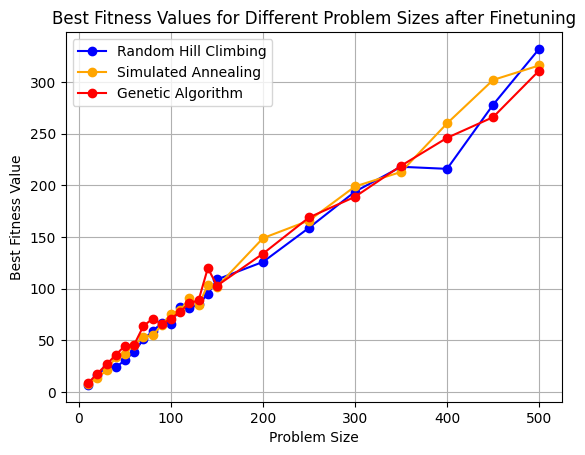

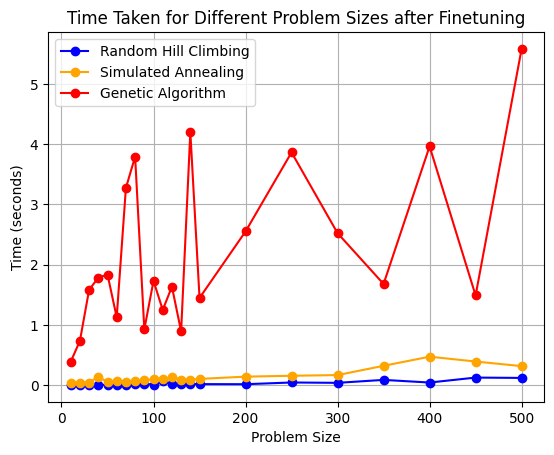

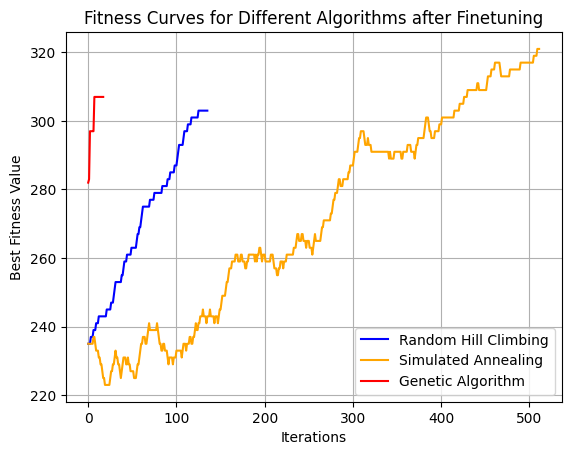

In [5]:
fitness = mlrose.FlipFlop()
state = 100

# Function to run optimization algorithms on a given problem
def finetuned_run_optimizations(problem_length, state):
    problem_length, init_state_var = initialize(problem_length)
    problem = mlrose.DiscreteOpt(length=problem_length, fitness_fn=fitness, maximize=True, max_val=2)
    
    # Random Hill Climbing
    start_time = time.time()
    rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose.random_hill_climb(problem,
                                                                                  max_attempts=10, 
                                                                                  max_iters=best_rhc_stats['max_iters'], 
                                                                                  restarts=best_rhc_stats['Restarts'], 
                                                                                  init_state=init_state_var, 
                                                                                  curve=True, 
                                                                                  random_state=state)
    rhc_time = time.time() - start_time
    
    # Simulated Annealing
    start_time = time.time()
    sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose.simulated_annealing(problem,
                                                                                  #schedule=mlrose.ExpDecay(),
                                                                                  max_attempts=10, 
                                                                                  max_iters=best_sa_stats['max_iters'], 
                                                                                  init_state=init_state_var, 
                                                                                  curve=True,
                                                                                  schedule = mlrose.ExpDecay(init_temp=best_initial_temparature) ,
                                                                                  random_state=state)
    sa_time = time.time() - start_time
    
    # Genetic Algorithm
    start_time = time.time()
    ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose.genetic_alg(problem, 
                                                                          #pop_size=200, 
                                                                          mutation_prob=best_ga_stats['Mutation Rate'], 
                                                                          max_attempts=10, 
                                                                          max_iters=best_ga_stats['max_iters'], 
                                                                          curve=True,
                                                                          pop_size = best_ga_stats['Population Size'], 
                                                                          random_state=state)
    ga_time = time.time() - start_time
    
    return rhc_best_state,sa_best_state,ga_best_state,rhc_best_fitness, sa_best_fitness, ga_best_fitness,rhc_fitness_curve, sa_fitness_curve, ga_fitness_curve , rhc_time, sa_time, ga_time

# Define different problem sizes
problem_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 200, 250, 300, 350, 400, 450, 500]
rhc_best_fitness_values = []
sa_best_fitness_values = []
ga_best_fitness_values = []
rhc_times = []
sa_times = []
ga_times = []

# Run optimization for each problem size and sizes

for size in problem_sizes:
    _,_,_,rhc_best_fitness, sa_best_fitness, ga_best_fitness,_,_,_,rhc_time, sa_time, ga_time = finetuned_run_optimizations(size, state)
    rhc_best_fitness_values.append(rhc_best_fitness)
    sa_best_fitness_values.append(sa_best_fitness)
    ga_best_fitness_values.append(ga_best_fitness)
    rhc_times.append(rhc_time)
    sa_times.append(sa_time)
    ga_times.append(ga_time)


# Plotting the best fitness values for different problem sizes
plt.figure()

plt.plot(problem_sizes, rhc_best_fitness_values, label='Random Hill Climbing', marker='o', color='blue')
plt.plot(problem_sizes, sa_best_fitness_values, label='Simulated Annealing', marker='o', color='orange')
plt.plot(problem_sizes, ga_best_fitness_values, label='Genetic Algorithm', marker='o', color='red')

# Adding title and labels
plt.title('Best Fitness Values for Different Problem Sizes after Finetuning')
plt.xlabel('Problem Size')
plt.ylabel('Best Fitness Value')
# Adding legend
plt.legend()
# Adding grid
plt.grid()
# Show the plot
plt.show()

# Plotting the time taken for different problem sizes
plt.figure()

plt.plot(problem_sizes, rhc_times, label='Random Hill Climbing', marker='o', color='blue')
plt.plot(problem_sizes, sa_times, label='Simulated Annealing', marker='o', color='orange')
plt.plot(problem_sizes, ga_times, label='Genetic Algorithm', marker='o', color='red')

# Adding title and labels
plt.title('Time Taken for Different Problem Sizes after Finetuning')
plt.xlabel('Problem Size')
plt.ylabel('Time (seconds)')
# Adding legend
plt.legend()
# Adding grid
plt.grid()
# Show the plot
plt.show()

problem_length = 500
state = 123
_,_,_,_,_,_,rhc_fitness_curve, sa_fitness_curve, ga_fitness_curve,_,_,_ = finetuned_run_optimizations(problem_length, state)
# Plotting the fitness curves for each algorithm
plt.figure()

plt.plot(rhc_fitness_curve[:,0], label='Random Hill Climbing', color='blue')
plt.plot(sa_fitness_curve[:,0], label='Simulated Annealing', color='orange')
plt.plot(ga_fitness_curve[:,0], label='Genetic Algorithm', color='red')

# Adding title and labels
plt.title('Fitness Curves for Different Algorithms after Finetuning')
plt.xlabel('Iterations')
plt.ylabel('Best Fitness Value')

# Adding legend
plt.legend()

# Adding grid
plt.grid()

# Show the plot
plt.show()

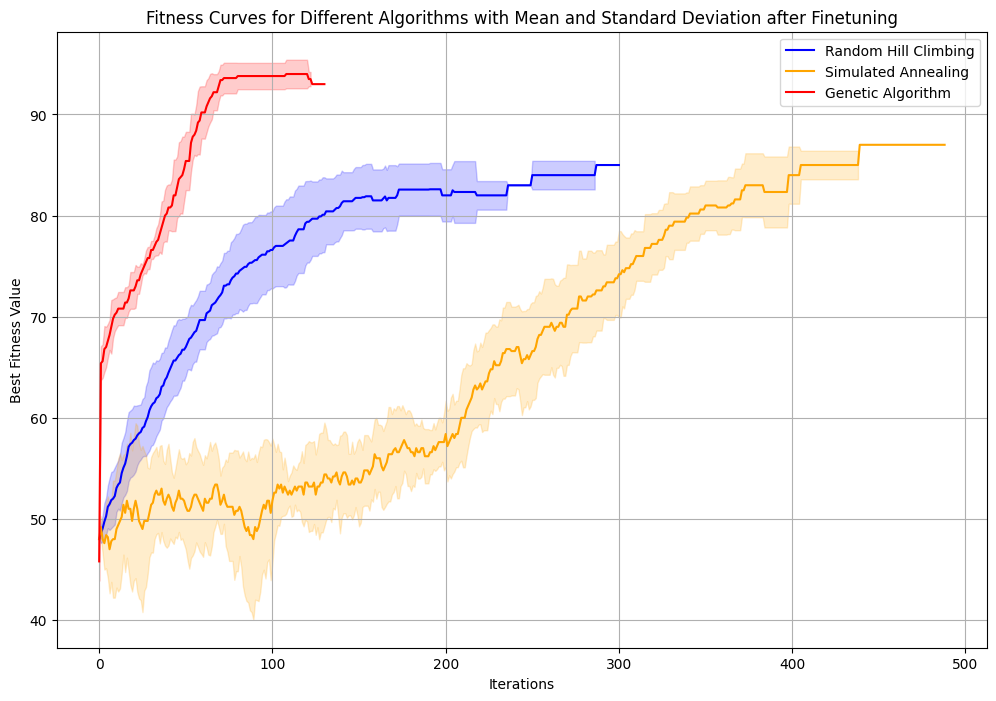

In [6]:
seeds = [42, 43, 44, 45, 46]
fitness = mlrose.FlipFlop()

# Function to initialize problem
def initialize(problem_length):
    init_state = np.random.randint(2, size=problem_length)
    return problem_length, init_state

# Function to run optimization algorithms on a given problem
def run_rhc(problem, init_state_var):
    rhc_results = []
    for state in seeds:
        rhc = mlrose.RHCRunner(problem=problem,
                            experiment_name="RHC_FlipFlop",
                            output_directory="./RHC_Optimization",
                            seed=state,
                            iteration_list=[best_rhc_stats['max_iters']], 
                            restart_list=[best_rhc_stats['Restarts']], 
                            max_attempts=50,
                            generate_curves=True,
                            init_state=init_state_var)
        rhc_run_stats, rhc_run_curves = rhc.run()
        rhc_results.append((rhc_run_stats, rhc_run_curves))
    return rhc_results

def run_sa(problem, init_state_var):
    sa_results = []
    for state in seeds:
        sa = mlrose.SARunner(problem=problem,
                                    experiment_name="SA_FlipFlop",
                                    output_directory="./SA_Optimization",
                                    seed=state,
                                    iteration_list=[best_sa_stats['max_iters']],
                                    temperature_list=[best_sa_stats['schedule_init_temp']],
                                    restart_list=best_sa_stats['restart_list'],
                                    decay_list=[mlrose.GeomDecay],
                                    max_attempts=10,
                                    generate_curves=True,
                                    init_state=init_state_var)
        sa_run_stats, sa_run_curves = sa.run()
        sa_results.append((sa_run_stats, sa_run_curves))
    return sa_results

def run_ga(problem, init_state_var):
    ga_results = []
    for state in seeds:
        ga = mlrose.GARunner(problem=problem,
                            experiment_name="GA_FlipFlop",
                            output_directory="./GA_Optimization",
                            seed=state,
                            iteration_list=[1000],
                             population_sizes=[300],
                             mutation_rates=[0.3],
                             max_attempts=50,
                             generate_curves=True,
                             init_state=init_state_var)
        ga_run_stats, ga_run_curves = ga.run()
        ga_results.append((ga_run_stats, ga_run_curves))
    return ga_results

problem_length = 100
problem_length, init_state_var = initialize(problem_length)
problem = mlrose.DiscreteOpt(length=problem_length, fitness_fn=fitness, maximize=True, max_val=2)

rhc_results = run_rhc(problem, init_state_var)
sa_results = run_sa(problem, init_state_var)
ga_results = run_ga(problem, init_state_var)

# Combine results
def combine_results(results):
    combined_run_stats = pd.concat([res[0] for res in results])
    combined_run_curves = pd.concat([res[1] for res in results])
    return combined_run_stats, combined_run_curves

combined_rhc_stats, combined_rhc_curves = combine_results(rhc_results)
combined_sa_stats, combined_sa_curves = combine_results(sa_results)
combined_ga_stats, combined_ga_curves = combine_results(ga_results)
# max_iteration = max(combined_sa_curves.iloc[-1]["Iteration"],combined_rhc_curves.iloc[-1]["Iteration"],combined_ga_curves.iloc[-1]["Iteration"])

# last_iteration = combined_ga_curves.iloc[-1]

# # Create new rows based on the last iteration
# new_rows = []
# for i in range(last_iteration['Iteration'] + 1, max_iteration + 1):
#     new_row = last_iteration.copy()
#     new_row['Iteration'] = i
#     new_rows.append(new_row)

# # Convert the list of new rows to a DataFrame
# new_rows_df = pd.DataFrame(new_rows)

# # Concatenate the new rows with the original DataFrame
# combined_ga_curves = pd.concat([combined_ga_curves, new_rows_df], ignore_index=True)

# last_iteration = combined_ga_curves.iloc[-1]

# # Create new rows based on the last iteration
# new_rows = []
# for i in range(last_iteration['Iteration'] + 1, max_iteration + 1):
#     new_row = last_iteration.copy()
#     new_row['Iteration'] = i
#     new_rows.append(new_row)

# # Convert the list of new rows to a DataFrame
# new_rows_df = pd.DataFrame(new_rows)

# # Concatenate the new rows with the original DataFrame
# combined_ga_curves = pd.concat([combined_ga_curves, new_rows_df], ignore_index=True)



# Plot results for fitness curves with mean and standard deviation
def plot_fitness_curves(combined_curves, algorithm_name, color):
    iterations = sorted(combined_curves['Iteration'].unique())
    mean_fitness = [combined_curves[combined_curves['Iteration'] == i]['Fitness'].mean() for i in iterations]
    std_fitness = [combined_curves[combined_curves['Iteration'] == i]['Fitness'].std() for i in iterations]

    plt.plot(iterations, mean_fitness, label=f'{algorithm_name}', color=color)
    plt.fill_between(iterations, np.array(mean_fitness) - np.array(std_fitness), 
                     np.array(mean_fitness) + np.array(std_fitness), color=color, alpha=0.2)

plt.figure(figsize=(12, 8))
plot_fitness_curves(combined_rhc_curves, 'Random Hill Climbing', 'blue')
plot_fitness_curves(combined_sa_curves, 'Simulated Annealing', 'orange')
plot_fitness_curves(combined_ga_curves, 'Genetic Algorithm', 'red')

plt.xlabel('Iterations')
plt.ylabel('Best Fitness Value')
plt.title('Fitness Curves for Different Algorithms with Mean and Standard Deviation after Finetuning')
plt.legend()
plt.grid(True)
plt.savefig('FitnessCurvesWithMeanAndStd', dpi=300)
plt.show()



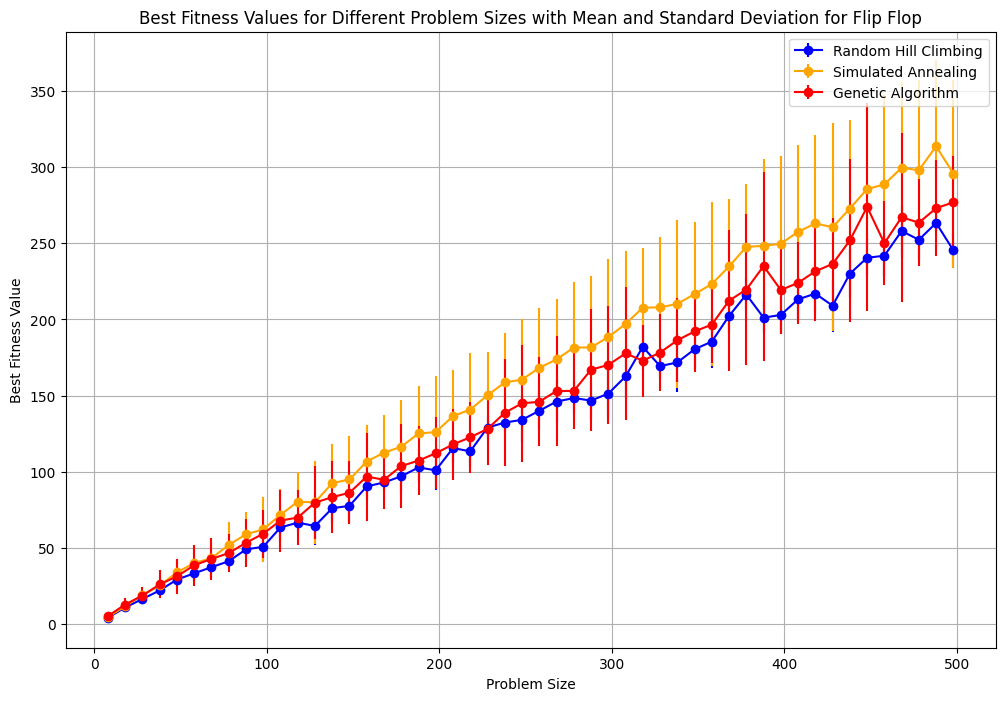

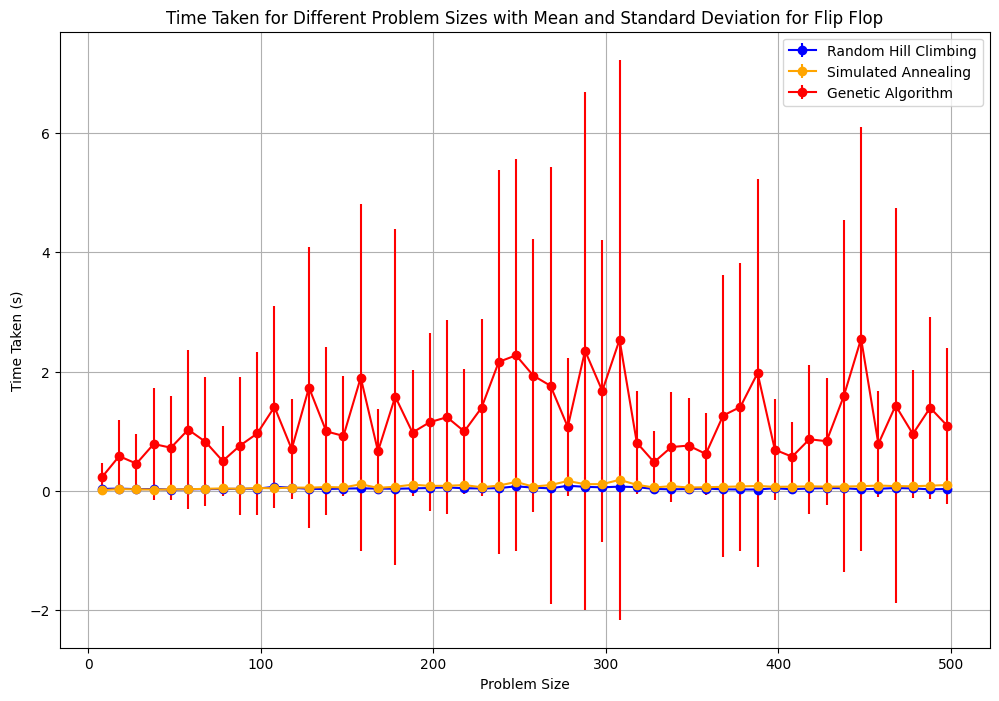

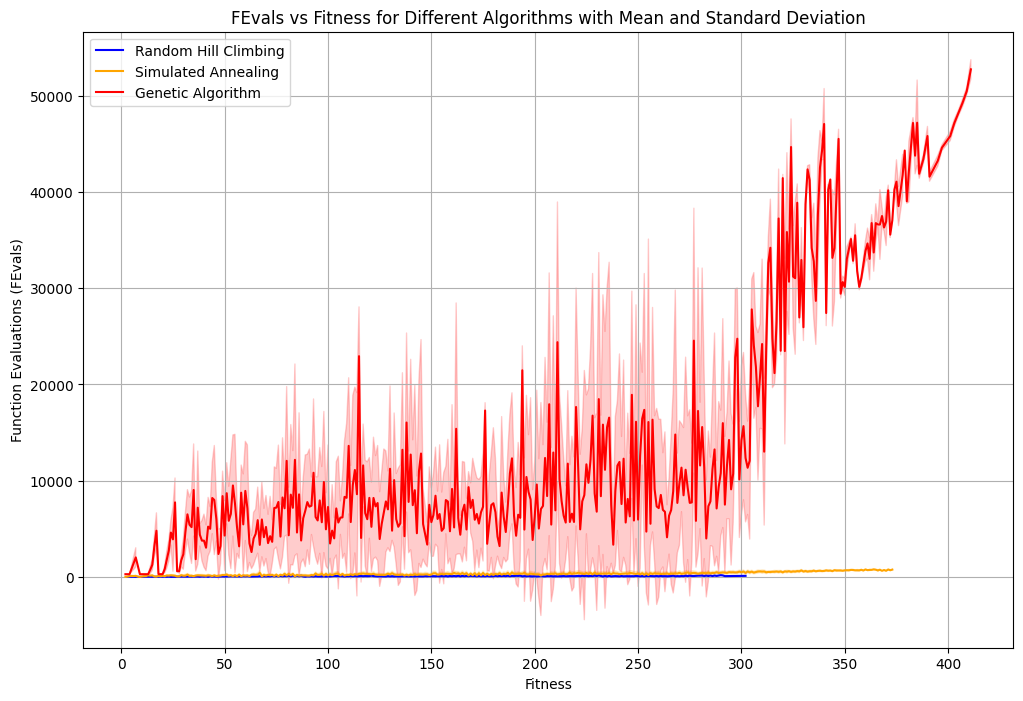

In [7]:
def initialize(problem_length):
    init_state = np.random.randint(2, size=problem_length)
    return problem_length, init_state

def run_rhc(problem, init_state_var):
    rhc_results = []
    for state in seeds:
        rhc = mlrose.RHCRunner(problem=problem,
                            experiment_name="RHC_FlipFlop",
                            output_directory="./RHC_Optimization",
                            seed=state,
                            iteration_list=[best_rhc_stats['max_iters']], 
                            restart_list=[best_rhc_stats['Restarts']], 
                            max_attempts=10,
                            generate_curves=True,
                            init_state=init_state_var)
        rhc_run_stats, rhc_run_curves = rhc.run()
        rhc_results.append((rhc_run_stats, rhc_run_curves))
    return rhc_results

def run_sa(problem, init_state_var):
    sa_results = []
    for state in seeds:
        sa = mlrose.SARunner(problem=problem,
                                    experiment_name="SA_FlipFlop",
                                    output_directory="./SA_Optimization",
                                    seed=state,
                                    iteration_list=[best_sa_stats['max_iters']],
                                    temperature_list=[1],
                                    restart_list=best_sa_stats['restart_list'],
                                    decay_list=[mlrose.ExpDecay],
                                    max_attempts=10,
                                    generate_curves=True,
                                    init_state=init_state_var)
        sa_run_stats, sa_run_curves = sa.run()
        sa_results.append((sa_run_stats, sa_run_curves))
    return sa_results

def run_ga(problem, init_state_var):
    ga_results = []
    for state in seeds:
        ga = mlrose.GARunner(problem=problem,
                            experiment_name="GA_FlipFlop",
                            output_directory="./GA_Optimization",
                            seed=state,
                            iteration_list=[best_ga_stats['max_iters']],
                            population_sizes=[best_ga_stats['Population Size']],
                            mutation_rates=[best_ga_stats['Mutation Rate']],
                            max_attempts=10,
                            generate_curves=True,
                            init_state=init_state_var)
        ga_run_stats, ga_run_curves = ga.run()
        ga_results.append((ga_run_stats, ga_run_curves))
    return ga_results

problem_lengths = list(range(8, 500, 10))

all_rhc_results = []
all_sa_results = []
all_ga_results = []

for problem_length in problem_lengths:
    problem_length, init_state_var = initialize(problem_length)
    problem = mlrose.DiscreteOpt(length=problem_length, fitness_fn=fitness, maximize=True, max_val=2)

    rhc_results = run_rhc(problem, init_state_var)
    sa_results = run_sa(problem, init_state_var)
    ga_results = run_ga(problem, init_state_var)

    all_rhc_results.append(rhc_results)
    all_sa_results.append(sa_results)
    all_ga_results.append(ga_results)

# Combine results
def combine_results(results):
    combined_run_stats = pd.concat([res[0] for res in results])
    combined_run_curves = pd.concat([res[1] for res in results])
    return combined_run_stats, combined_run_curves

combined_rhc_stats, combined_rhc_curves = zip(*[combine_results(res) for res in all_rhc_results])
combined_sa_stats, combined_sa_curves = zip(*[combine_results(res) for res in all_sa_results])
combined_ga_stats, combined_ga_curves = zip(*[combine_results(res) for res in all_ga_results])

# Plot results
def plot_results(combined_stats, algorithm_name, color):
    mean_fitness = [stats['Fitness'].mean() for stats in combined_stats]
    std_fitness = [stats['Fitness'].std() for stats in combined_stats]

    plt.errorbar(problem_lengths, mean_fitness, yerr=std_fitness, fmt='-o', label=f'{algorithm_name}', color=color)
    
plt.figure(figsize=(12, 8))
plot_results(combined_rhc_stats, 'Random Hill Climbing', 'blue')
plot_results(combined_sa_stats, 'Simulated Annealing', 'orange')
plot_results(combined_ga_stats, 'Genetic Algorithm', 'red')

plt.xlabel('Problem Size')
plt.ylabel('Best Fitness Value')
plt.title('Best Fitness Values for Different Problem Sizes with Mean and Standard Deviation for Flip Flop')
plt.legend()
plt.grid(True)
plt.savefig('FitnessvaluefordifferentproblemsizesforFlipFlop', dpi=300)
plt.show()
#locked

def plot_time_results(combined_stats, algorithm_name, color):
    mean_time = [stats['Time'].mean() for stats in combined_stats]
    std_time = [stats['Time'].std() for stats in combined_stats]

    plt.errorbar(problem_lengths, mean_time, yerr=std_time, fmt='-o', label=f'{algorithm_name}', color=color)
    
plt.figure(figsize=(12, 8))
plot_time_results(combined_rhc_stats, 'Random Hill Climbing', 'blue')
plot_time_results(combined_sa_stats, 'Simulated Annealing', 'orange')
plot_time_results(combined_ga_stats, 'Genetic Algorithm', 'red')

plt.xlabel('Problem Size')
plt.ylabel('Time Taken (s)')
plt.title('Time Taken for Different Problem Sizes with Mean and Standard Deviation for Flip Flop')
plt.legend()
plt.grid(True)
plt.savefig('TimeTakenForDifferentProblemSizesForFlipFlop', dpi=300)
plt.show()


combined_rhc_stats = pd.concat(combined_rhc_stats)
combined_rhc_curves = pd.concat(combined_rhc_curves)
combined_sa_stats = pd.concat(combined_sa_stats)
combined_sa_curves = pd.concat(combined_sa_curves)
combined_ga_stats = pd.concat(combined_ga_stats)
combined_ga_curves = pd.concat(combined_ga_curves)

# Plot results for fitness vs fevals
def plot_fitness_vs_fevals(combined_curves, algorithm_name, color):
    fitness_mean = combined_curves.groupby('Fitness')['FEvals'].mean()
    fitness_std = combined_curves.groupby('Fitness')['FEvals'].std()

    plt.plot(fitness_mean.index, fitness_mean, label=f'{algorithm_name}', color=color)
    plt.fill_between(fitness_mean.index, fitness_mean - fitness_std, 
                     fitness_mean + fitness_std, color=color, alpha=0.2)

plt.figure(figsize=(12, 8))
plot_fitness_vs_fevals(combined_rhc_curves, 'Random Hill Climbing', 'blue')
plot_fitness_vs_fevals(combined_sa_curves, 'Simulated Annealing', 'orange')
plot_fitness_vs_fevals(combined_ga_curves, 'Genetic Algorithm', 'red')

plt.ylabel('Function Evaluations (FEvals)')
plt.xlabel('Fitness')
plt.title('FEvals vs Fitness for Different Algorithms with Mean and Standard Deviation')
plt.legend()
plt.grid(True)
plt.savefig('FEvalsVsFitness', dpi=300)
plt.show()


